In [1]:
%matplotlib inline 
#在页面上绘图
import numpy as np
np.set_printoptions(suppress=True)#不已科学记数法输出
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from pre_data import load_data
from pre_data import load_data_by_percentage
from pre_data import load_for_novelty_detection
import warnings #不打印warning
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neural_network import MLPClassifier

# 任务一:

#### load训练集、测试集
load_data()中已经对数据进行了shuffle

In [2]:
train_set_X, train_set_Y, test_set_X, test_set_Y = load_data()

assert len(train_set_X) == len(train_set_Y)
assert len(test_set_X) == len(test_set_Y)
print(train_set_X.shape)
print(train_set_Y.shape)
print(test_set_X.shape)
print(test_set_Y.shape)

data size: 17898
train_set size: 12528
test_set size: 5370
(12528, 8)
(12528, 1)
(5370, 8)
(5370, 1)


#### 数据标准化处理
将各个特征的取值进行标准化

In [3]:
std = StandardScaler()
print(train_set_X.T[0])
train_set_X = std.fit_transform(train_set_X)
test_set_X = std.fit_transform(test_set_X)
print(train_set_X.T[0])

[130.578125  130.296875   48.8046875 ... 107.3359375 116.453125
 130.6875   ]
[ 0.76503413  0.75407596 -2.4210543  ... -0.14053701  0.21469039
  0.76929564]


#### 定义模型评分准则: precision / recall

In [4]:
def get_score(classify_method, test_X, test_Y):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    #print(len(test_set_X))
    for i in range(0,len(test_X)):
        
        predict_class = classify_method.predict(test_X[i].reshape(1,8))[0]
        real_class = test_Y[i]
        
        if predict_class == 1 and real_class == 1:
            TP += 1
        elif predict_class == 1 and real_class == 0:
            FP += 1
        elif predict_class == 0 and real_class == 1:
            FN += 1
        elif predict_class == 0 and real_class == 0:
            TN += 1
    #print("TP | FP")
    #print(TP,"",FP)    
    #print("FN | TN")
    #print(FN,"", TN)
    if (TP + FP)==0 or (TP+FN)==0 :
        return 0, 0, 0
    precision = TP /(TP + FP)#精确率
    recall = TP / (TP + FN)#召回率
    #print("precision：%.3f%%"%(precision*100))
    #print("recall：%.3f%%"%(recall*100))
    F1 = (2 * precision * recall)/(precision + recall)
    return F1, precision, recall

def result_print(classify_method, test_X, test_Y):
    F1, precision, recall = get_score(classify_method, test_X, test_Y)
    print("F1：%.3f"%F1)

#### 选择分类模型
使用scikit-learn中全连接的人工神经MLPClassifier进行分类

In [9]:
nn_clf = MLPClassifier()
nn_clf.fit(train_set_X,train_set_Y)
result_print(nn_clf, test_set_X, test_set_Y)

F1：0.881


隐藏层取不同隐藏层节点数目模型的表现

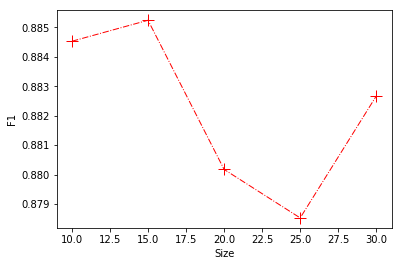

In [13]:
models_layer = (MLPClassifier(hidden_layer_sizes=(10)),
                MLPClassifier(hidden_layer_sizes=(15)),
                MLPClassifier(hidden_layer_sizes=(20)),
                MLPClassifier(hidden_layer_sizes=(25)),
                MLPClassifier(hidden_layer_sizes=(30))
               )
models_layer = (nn_clf.fit(train_set_X, train_set_Y) for nn_clf in models_layer)
plt.ylabel('F1')
plt.xlabel('Size')
x = [10, 15, 20, 25, 30]
y = []
for nn_clf in models_layer:
    F1, precision, recall = get_score(nn_clf, test_set_X, test_set_Y)
    y.append(F1)
plt.plot(x, y, 'r+-.', linewidth=1, markersize=12)
plt.show()

学习率alpha取不同值时模型的表现

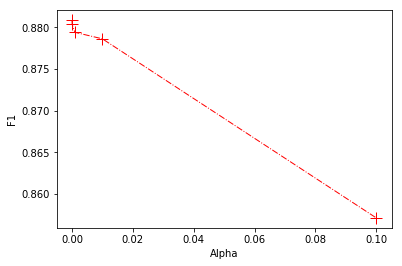

In [54]:
models_alpha = (MLPClassifier(hidden_layer_sizes=(10,), alpha = 0.0001),
               MLPClassifier(hidden_layer_sizes=(10,), alpha = 0.001),
                MLPClassifier(hidden_layer_sizes=(10,), alpha = 0.01),
                MLPClassifier(hidden_layer_sizes=(10,), alpha = 0.1),
                MLPClassifier(hidden_layer_sizes=(10,), alpha = 1),
               )
models_alpha = (nn_clf.fit(train_set_X, train_set_Y) for nn_clf in models_alpha)
plt.ylabel('F1')
plt.xlabel('Alpha')
x_alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1]
y_alpha = []
for nn_clf in models_alpha:
    F1, precision, recall = get_score(nn_clf, test_set_X, test_set_Y)
    y_alpha.append(F1)
plt.plot(x_alpha, y_alpha, 'r+-.', linewidth=1, markersize=12)
plt.show()

L2正则化项系数λ取不同值时模型的表现

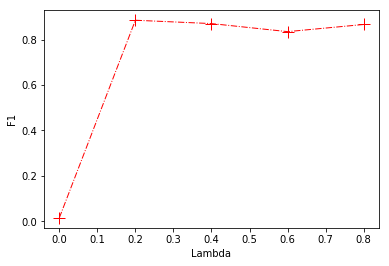

In [15]:
models_lambda = (
                MLPClassifier(hidden_layer_sizes=(10,), beta_2= 0),
                MLPClassifier(hidden_layer_sizes=(10,), beta_2= 0.2),
               MLPClassifier(hidden_layer_sizes=(10,), beta_2= 0.4),
                MLPClassifier(hidden_layer_sizes=(10,), beta_2= 0.6),
                MLPClassifier(hidden_layer_sizes=(10,), beta_2= 0.8),
               )
models_lambda = (nn_clf.fit(train_set_X, train_set_Y) for nn_clf in models_lambda)
plt.ylabel('F1')
plt.xlabel('Lambda')
x_lambda = np.arange(0, 1, 0.2)
y_lambda = []
for nn_clf in models_lambda:
    F1, precision, recall = get_score(nn_clf, test_set_X, test_set_Y)
    y_lambda.append(F1)
plt.plot(x_lambda, y_lambda, 'r+-.', linewidth=1, markersize=12)
plt.show()

不加L2正则化造成的overfitting情况

In [31]:
nn_clf_overfitting = MLPClassifier(hidden_layer_sizes=(10,10), beta_2= 0.0) #令λ = 0
nn_clf_overfitting.fit(train_set_X, train_set_Y)
result_print(nn_clf_overfitting)

TP | FP
0  0
FN | TN
522  4848
F1：0.000


修改其它超参数情况下人工神经网络的表现

In [78]:
models = (
        MLPClassifier(hidden_layer_sizes=(10,10), alpha = 0.0001,  beta_2= 0.99),
          MLPClassifier(hidden_layer_sizes=(10,5,5), alpha = 0.0001,  beta_2= 0.99),
          MLPClassifier(hidden_layer_sizes=(8,10,5), alpha = 0.0001,  beta_2= 0.99),
          MLPClassifier(hidden_layer_sizes=(15,8), alpha = 0.0001,  beta_2= 0.99),
          MLPClassifier(hidden_layer_sizes=(10,),activation='relu', alpha = 0.0001,  beta_2= 0.99),
          MLPClassifier(hidden_layer_sizes=(10,),activation='identity', alpha = 0.0001,  beta_2= 0.99),
          MLPClassifier(hidden_layer_sizes=(10,),activation='logistic', alpha = 0.0001,  beta_2= 0.99),
          MLPClassifier(hidden_layer_sizes=(10,),activation='tanh', alpha = 0.0001,  beta_2= 0.99),
         )
models = (svc_clf.fit(train_set_X, train_set_Y) for svc_clf in models)

In [79]:
count = 0
for nn_clf in models:
    count += 1
    print("model:", count, ":")
    result_print(nn_clf)

model: 1 :
F1：0.877
model: 2 :
F1：0.884
model: 3 :
F1：0.877
model: 4 :
F1：0.881
model: 5 :
F1：0.879
model: 6 :
F1：0.871
model: 7 :
F1：0.876
model: 8 :
F1：0.876


对任务一下测试下sklearn中的SVM的表现

In [80]:
svc_clf = svm.SVC()
svc_clf.fit(train_set_X, train_set_Y)
result_print(svc_clf)

F1：0.872


# 任务二:

加载不同正负例比例的训练集，并进行训练和评分

In [30]:
F1_list = []
precison_list = []
recall_list = []
for i in range(1, 51):
    print("1 :", i)
    train_set_Xp, train_set_Yp, test_set_Xp, test_set_Yp = load_data_by_percentage(i)
    
    std = StandardScaler()
    train_set_Xp = std.fit_transform(train_set_Xp)
    test_set_Xp = std.fit_transform(test_set_Xp)
    
    nn_clf = MLPClassifier()
    nn_clf.fit(train_set_Xp, train_set_Yp)
    F1, precision, recall = get_score(nn_clf, test_set_Xp, test_set_Yp)
    print("F1：%.3f"%F1)
    F1_list.append(F1)   
    precison_list.append(precision)
    recall_list.append(recall)

1 : 1
train_set size: 2294
including positive case: 1147
including negative case : 1147
test_set size: 1000
including positive case: 400
including negative case : 600
F1：0.912
1 : 2
train_set size: 2294
including positive case: 764
including negative case : 1530
test_set size: 1000
including positive case: 400
including negative case : 600
F1：0.909
1 : 3
train_set size: 2294
including positive case: 573
including negative case : 1721
test_set size: 1000
including positive case: 400
including negative case : 600
F1：0.865
1 : 4
train_set size: 2294
including positive case: 458
including negative case : 1836
test_set size: 1000
including positive case: 400
including negative case : 600
F1：0.851
1 : 5
train_set size: 2294
including positive case: 382
including negative case : 1912
test_set size: 1000
including positive case: 400
including negative case : 600
F1：0.821
1 : 6
train_set size: 2294
including positive case: 327
including negative case : 1967
test_set size: 1000
including positiv

F1：0.312
1 : 48
train_set size: 2294
including positive case: 46
including negative case : 2248
test_set size: 1000
including positive case: 400
including negative case : 600
F1：0.344
1 : 49
train_set size: 2294
including positive case: 45
including negative case : 2249
test_set size: 1000
including positive case: 400
including negative case : 600
F1：0.387
1 : 50
train_set size: 2294
including positive case: 44
including negative case : 2250
test_set size: 1000
including positive case: 400
including negative case : 600
F1：0.340


绘制曲线进行观察

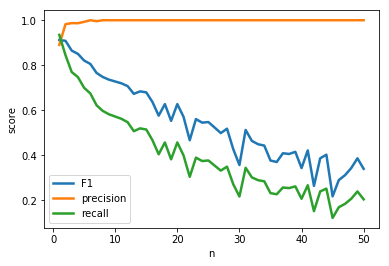

In [31]:
x_axis = np.arange(1, 51, 1)
y1 = F1_list
y2 = precison_list
y3 = recall_list
plt.plot(x_axis, y1, linewidth=2.5, markersize=12)
plt.plot(x_axis, y2, linewidth=2.5, markersize=12)
plt.plot(x_axis, y3, linewidth=2.5, markersize=12)
plt.xlabel("n")# X轴的标签
plt.ylabel("score")# y轴的标签
plt.legend(["F1","precision", "recall"])# 写出图例，图例内容与画图顺序一致。
# # 注意到，这里由于是两个或者两个以上的图例，需要用中括号表示,否则会显示出错
plt.show()#这个一定要最后显示，如果在定义标题、坐标轴标签以及图例之前，在其后注明的可能并不会显示

### novelty detection